## Telecommunications Company Churn Prediction

## Problem Statement

**You work in a data science team under one of the biggest Telecommunications company in the United States, TrustTelecom.** As the industry is highly competitive, and customers have the freedom to choose from a variety of service providers and actively switch from one to the next, making it incredibly challenging for companies to retain their customers. In fact, acquiring new customers is not only more difficult but also much more costly than maintaining existing customer relationships.


## Business Context

**You have been tasked by higher management to build a customer churn prediction model** to identify customers who are likely to “churn”, i.e. switch to another service provider in the next month. This helps the customer care team reach out in a timely manner to understand user frustrations (if any), and extend the necessary discounts, offers and refunds in a bid to retain these customers in the long run.

## Connecting to SQL

In [2]:
import pandas as pd
from sqlalchemy import create_engine

ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DBNAME}')

In [3]:
query = """
    SELECT * FROM account;
"""

df_account = pd.read_sql(query, database_conn)
df_account

,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method
0,AAJU-HMJLK,0334-ZFJSR,55,0,Yes,Cable,No,Yes,Yes,Yes,Yes,Yes,No,One Year,Yes,Credit Card
1,AAKY-HUGJV,6235-VDHOM,5,0,Yes,DSL,Yes,No,No,No,No,Yes,No,Month-to-Month,No,Bank Withdrawal
2,AAMB-TJYWC,4006-HKYHO,63,0,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal
3,AANL-MWPZF,3258-SYSWS,72,0,Yes,Fiber Optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal
4,AAOS-KANBS,5360-XGYAZ,72,1,Yes,DSL,No,No,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,ZZHC-VLZUC,1169-SAOCL,49,0,Yes,Fiber Optic,No,Yes,Yes,Yes,No,Yes,No,One Year,Yes,Bank Withdrawal
7039,ZZKH-HTGCT,7115-IRDHS,72,3,No,None,No,Yes,Yes,No,No,No,No,Two Year,No,Bank Withdrawal
7040,ZZPL-VSYXD,5119-KEPFY,36,3,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal
7041,ZZUR-SCFQL,3926-CUQZX,1,0,Yes,DSL,Yes,Yes,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal


In [4]:
query = """
SELECT *
FROM churn_status AS cs
JOIN customer AS c ON cs.customer_id = c.customer_id
JOIN account AS a ON cs.customer_id = a.customer_id
JOIN account_usage AS au ON a.account_id = au.account_id
JOIN city AS city ON c.zip_code = city.zip_code

"""

df = pd.read_sql(query, database_conn)
df

,customer_id,status,churn_label,churn_category,churn_reason,customer_id,gender,age,senior_citizen,married,...,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,zip_code,city,latitutde,longitude,population
0,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability,0013-EXCHZ,Female,75,Yes,Yes,...,No,83.90,267.40,0.00,607,93010,Camarillo,34.227846,-119.079903,42853
1,0014-BMAQU,Stayed,No,,,0014-BMAQU,Male,52,No,Yes,...,No,84.65,5377.80,0.00,963,94558,Napa,38.489789,-122.270110,63947
2,0016-QLJIS,Stayed,No,,,0016-QLJIS,Female,43,No,Yes,...,Yes,90.45,5957.90,0.00,1390,95681,Sheridan,38.984756,-121.345074,1219
3,0019-EFAEP,Stayed,No,,,0019-EFAEP,Female,32,No,No,...,No,101.30,7261.25,0.00,303,91942,La Mesa,32.782501,-117.016110,24005
4,0019-GFNTW,Stayed,No,,,0019-GFNTW,Female,39,No,No,...,No,45.05,2560.10,0.00,716,93441,Los Olivos,34.704340,-120.026090,1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9412-ARGBX,Churned,Yes,Competitor,Competitor made better offer,9412-ARGBX,Female,47,No,No,...,No,95.50,4627.85,0.00,72,90241,Downey,33.940884,-118.128628,40152
7039,9522-ZSINC,Stayed,No,,,9522-ZSINC,Male,34,No,No,...,No,19.95,253.80,0.00,1226,95409,Santa Rosa,38.468893,-122.580539,25718
7040,9524-EGPJC,Churned,Yes,Competitor,Competitor offered higher download speeds,9524-EGPJC,Female,33,No,No,...,Yes,90.10,1612.75,48.26,991,94595,Walnut Creek,37.862128,-122.075197,18024
7041,9975-SKRNR,Joined,No,,,9975-SKRNR,Male,24,No,No,...,No,18.90,18.90,0.00,1611,96126,Sierraville,39.559709,-120.345639,227


In [5]:
# Identify duplicated columns
duplicated_cols = df.columns.duplicated(keep='first')

# Keep only the first occurrence of each column
df = df.loc[:, ~duplicated_cols]

df

,customer_id,status,churn_label,churn_category,churn_reason,gender,age,senior_citizen,married,num_dependents,...,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,city,latitutde,longitude,population
0,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability,Female,75,Yes,Yes,0,...,No,No,83.90,267.40,0.00,607,Camarillo,34.227846,-119.079903,42853
1,0014-BMAQU,Stayed,No,,,Male,52,No,Yes,0,...,No,No,84.65,5377.80,0.00,963,Napa,38.489789,-122.270110,63947
2,0016-QLJIS,Stayed,No,,,Female,43,No,Yes,1,...,Yes,Yes,90.45,5957.90,0.00,1390,Sheridan,38.984756,-121.345074,1219
3,0019-EFAEP,Stayed,No,,,Female,32,No,No,0,...,No,No,101.30,7261.25,0.00,303,La Mesa,32.782501,-117.016110,24005
4,0019-GFNTW,Stayed,No,,,Female,39,No,No,0,...,No,No,45.05,2560.10,0.00,716,Los Olivos,34.704340,-120.026090,1317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9412-ARGBX,Churned,Yes,Competitor,Competitor made better offer,Female,47,No,No,0,...,No,No,95.50,4627.85,0.00,72,Downey,33.940884,-118.128628,40152
7039,9522-ZSINC,Stayed,No,,,Male,34,No,No,0,...,No,No,19.95,253.80,0.00,1226,Santa Rosa,38.468893,-122.580539,25718
7040,9524-EGPJC,Churned,Yes,Competitor,Competitor offered higher download speeds,Female,33,No,No,0,...,Yes,Yes,90.10,1612.75,48.26,991,Walnut Creek,37.862128,-122.075197,18024
7041,9975-SKRNR,Joined,No,,,Male,24,No,No,0,...,No,No,18.90,18.90,0.00,1611,Sierraville,39.559709,-120.345639,227


In [6]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 40


In [7]:
print(df.columns)

Index(['customer_id', 'status', 'churn_label', 'churn_category',
       'churn_reason', 'gender', 'age', 'senior_citizen', 'married',
       'num_dependents', 'zip_code', 'account_id', 'tenure_months',
       'num_referrals', 'has_internet_service', 'internet_type',
       'has_unlimited_data', 'has_phone_service', 'has_multiple_lines',
       'has_premium_tech_support', 'has_online_security', 'has_online_backup',
       'has_device_protection', 'contract_type', 'paperless_billing',
       'payment_method', 'avg_long_distance_fee_monthly',
       'total_long_distance_fee', 'avg_gb_download_monthly', 'stream_tv',
       'stream_movie', 'stream_music', 'total_monthly_fee',
       'total_charges_quarter', 'total_refunds', 'area_id', 'city',
       'latitutde', 'longitude', 'population'],
      dtype='object')


In [8]:
# Let save a local copy of the full dataframe into the local csv file
df.to_csv('full_output.csv', index=False)

## Importing the necessary libraries

In [9]:
# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# library to split data
from sklearn.model_selection import train_test_split

# library to build ML model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# library to tune ML model
from sklearn.model_selection import GridSearchCV

# libraries to evaluate the ML model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score ,make_scorer, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# libraries to deploy the ML model
import os
import joblib

# Current version of Seaborn generates a bunch of warnings that we'll ignore in this tutorial
import warnings 
warnings.filterwarnings("ignore")

We are going to make use of the churn_label column as the Target Feature. However it seems that there are some empty rows in this column and we are going to take a look at it to understand it;s relationship with the status column.

In [10]:
# Identify columns with NaN or empty string values
nan_or_empty_columns = df.columns[df.isnull().any() | (df == '').any()].tolist()

print("Columns with NaN or empty string values:", nan_or_empty_columns)

Columns with NaN or empty string values: ['churn_label', 'churn_category', 'churn_reason']


Let perform the data cleaning for the Column 'churn_label' using the information on column status

In [11]:
# Fill `churn_label` with "Yes" where `status` is "Churned" and `churn_label` is blank
df.loc[(df['status'] == 'Churned') & (df['churn_label'] == ''), 'churn_label'] = 'Yes'


Since this is a Binary Classification example, we will be using the churn_label as the Target feature, and we will drop the following columns:
'churn_category' and 'churn_reason'

In [12]:
# Drop some more columns which are not used in the Features Engineering after performing the EDA.
df.drop(columns=['churn_category'], axis=1, inplace=True)
df.drop(columns=['churn_reason'], axis=1, inplace=True)

# Identify columns with NaN or empty string values
nan_or_empty_columns = df.columns[df.isnull().any() | (df == '').any()].tolist()

print("Columns with NaN or empty string values:", nan_or_empty_columns)

Columns with NaN or empty string values: []


In [13]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 38


## Exploratory Data Analysis


In [14]:
# creating a copy of the data to avoid any changes to original data
data = df.copy()

In [15]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7043.00,46.51,16.75,19.00,32.00,46.00,60.00,80.00
num_dependents,7043.00,0.47,0.96,0.00,0.00,0.00,0.00,9.00
zip_code,7043.00,93486.07,1856.77,90001.00,92101.00,93518.00,95329.00,96150.00
tenure_months,7043.00,32.39,24.54,1.00,9.00,29.00,55.00,72.00
num_referrals,7043.00,1.95,3.00,0.00,0.00,0.00,3.00,11.00
avg_long_distance_fee_monthly,7043.00,22.96,15.45,0.00,9.21,22.89,36.39,49.99
total_long_distance_fee,7043.00,749.10,846.66,0.00,70.55,401.44,1191.10,3564.72
avg_gb_download_monthly,7043.00,20.52,20.42,0.00,3.00,17.00,27.00,85.00
total_monthly_fee,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
total_charges_quarter,7043.00,2280.38,2266.22,18.80,400.15,1394.55,3786.60,8684.80


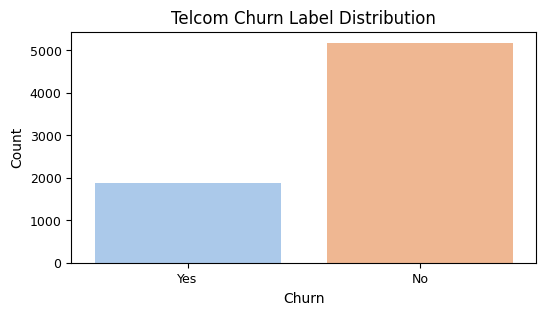

In [16]:
colors = sns.color_palette('pastel')[:len(data['churn_label'].unique())]

plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='churn_label', palette=colors)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Telcom Churn Label Distribution',fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [17]:
# Count the occurrences of each unique value in 'churn_label'
churn_label_counts = data['churn_label'].value_counts()
total_count = churn_label_counts.sum()
percentages = (churn_label_counts / total_count) * 100

# Create a DataFrame to display counts and percentages
summary_df = pd.DataFrame({
    'Count': churn_label_counts,
    'Percentage': percentages.map('{:.1f}%'.format)
})

print(summary_df)

             Count Percentage
churn_label                  
No            5174      73.5%
Yes           1869      26.5%


- Approx one-quarter of the customers will churn

In [18]:
# encoding the output (also called target) attribute

data["churn_label"] = data["churn_label"].apply(
    lambda x: 1 if x == "Yes" else 0
)

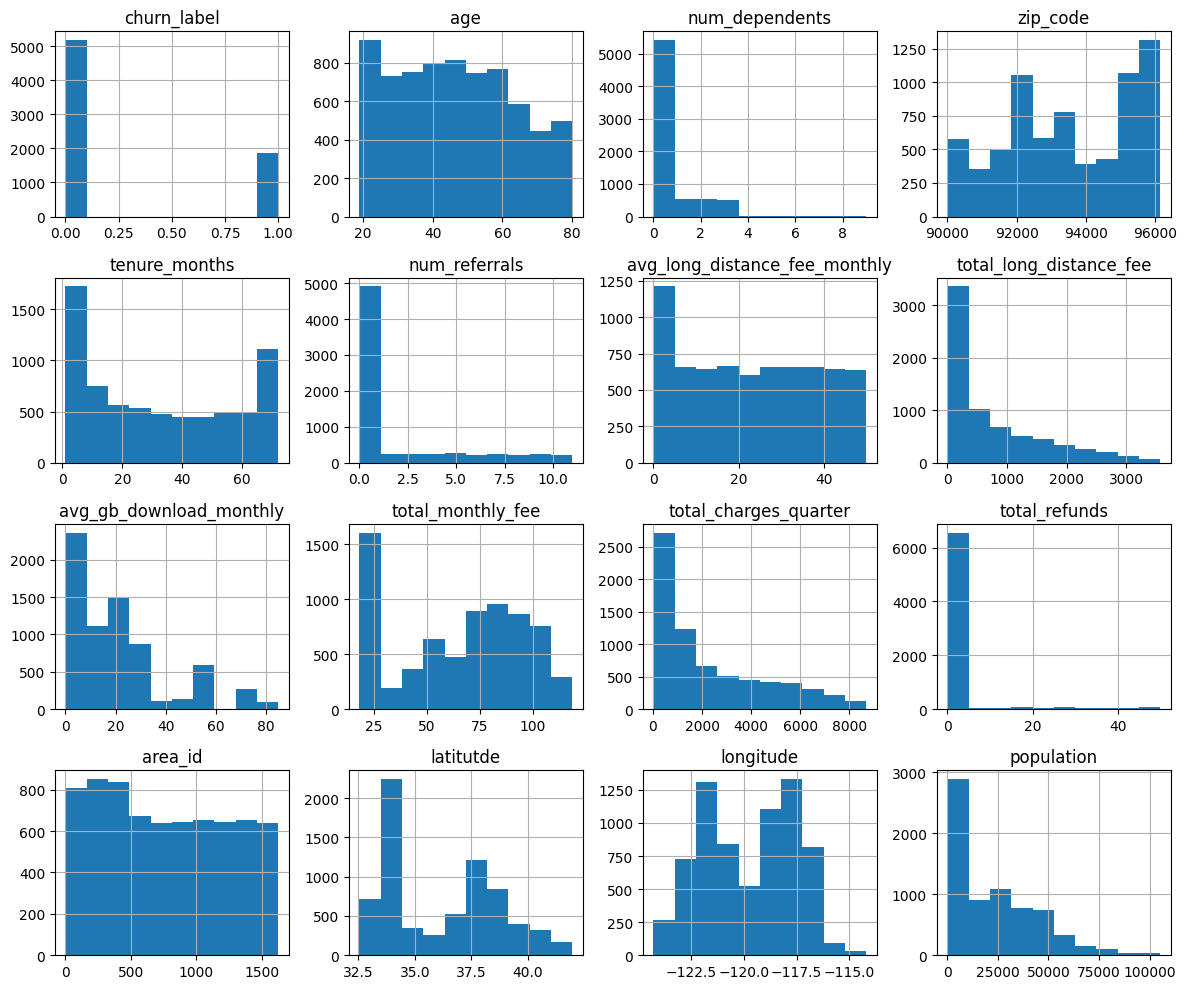

In [19]:
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

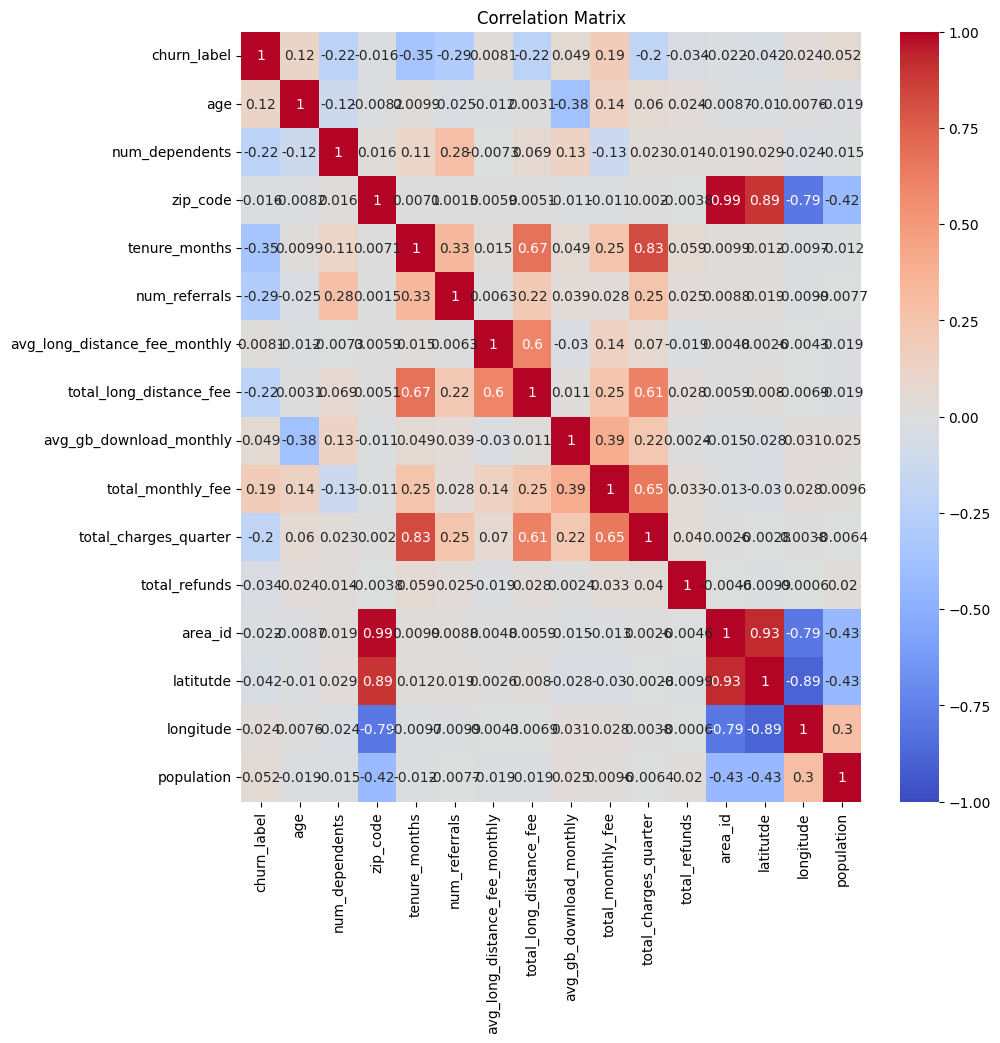

In [20]:
# Remove non-numeric columns from correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select numeric columns

# Generate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**I tried to remove those columns in the Dataframe which are not in used for this Binary Classification exercise.**

In [21]:
data.drop(columns=['account_id'], axis=1, inplace=True)
data.drop(columns=['customer_id'], axis=1, inplace=True)
data.drop(columns=['num_referrals'], axis=1, inplace=True)
data.drop(columns=['internet_type'], axis=1, inplace=True)
data.drop(columns=['has_unlimited_data'], axis=1, inplace=True)
data.drop(columns=['avg_long_distance_fee_monthly'], axis=1, inplace=True)
data.drop(columns=['total_long_distance_fee'], axis=1, inplace=True)
data.drop(columns=['avg_gb_download_monthly'], axis=1, inplace=True)
data.drop(columns=['total_refunds'], axis=1, inplace=True)
data.drop(columns=['status'], axis=1, inplace=True)
data.drop(columns=['area_id'], axis=1, inplace=True)
data.drop(columns=['population'], axis=1, inplace=True)
data.drop(columns=['num_dependents'], axis=1, inplace=True)
data.drop(columns=['city'], axis=1, inplace=True)
data.drop(columns=['latitutde'], axis=1, inplace=True)
data.drop(columns=['longitude'], axis=1, inplace=True)

num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 22


In [22]:
print(data.columns)

Index(['churn_label', 'gender', 'age', 'senior_citizen', 'married', 'zip_code',
       'tenure_months', 'has_internet_service', 'has_phone_service',
       'has_multiple_lines', 'has_premium_tech_support', 'has_online_security',
       'has_online_backup', 'has_device_protection', 'contract_type',
       'paperless_billing', 'payment_method', 'stream_tv', 'stream_movie',
       'stream_music', 'total_monthly_fee', 'total_charges_quarter'],
      dtype='object')


In [23]:
data

,churn_label,gender,age,senior_citizen,married,zip_code,tenure_months,has_internet_service,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter
0,1,Female,75,Yes,Yes,93010,3,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,Yes,No,No,83.90,267.40
1,0,Male,52,No,Yes,94558,63,Yes,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,No,No,No,84.65,5377.80
2,0,Female,43,No,Yes,95681,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,Yes,Yes,Yes,90.45,5957.90
3,0,Female,32,No,No,91942,72,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,Yes,No,No,101.30,7261.25
4,0,Female,39,No,No,93441,56,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,No,No,No,45.05,2560.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,Female,47,No,No,90241,48,Yes,Yes,No,Yes,No,Yes,Yes,Two Year,Yes,Credit Card,Yes,No,No,95.50,4627.85
7039,0,Male,34,No,No,95409,13,No,Yes,No,No,No,No,No,One Year,Yes,Bank Withdrawal,No,No,No,19.95,253.80
7040,1,Female,33,No,No,94595,18,Yes,Yes,Yes,Yes,No,No,No,Month-to-Month,Yes,Bank Withdrawal,No,Yes,Yes,90.10,1612.75
7041,0,Male,24,No,No,96126,1,No,Yes,No,No,No,No,No,Month-to-Month,No,Credit Card,No,No,No,18.90,18.90


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn_label               7043 non-null   int64  
 1   gender                    7043 non-null   object 
 2   age                       7043 non-null   int64  
 3   senior_citizen            7043 non-null   object 
 4   married                   7043 non-null   object 
 5   zip_code                  7043 non-null   int64  
 6   tenure_months             7043 non-null   int64  
 7   has_internet_service      7043 non-null   object 
 8   has_phone_service         7043 non-null   object 
 9   has_multiple_lines        7043 non-null   object 
 10  has_premium_tech_support  7043 non-null   object 
 11  has_online_security       7043 non-null   object 
 12  has_online_backup         7043 non-null   object 
 13  has_device_protection     7043 non-null   object 
 14  contract

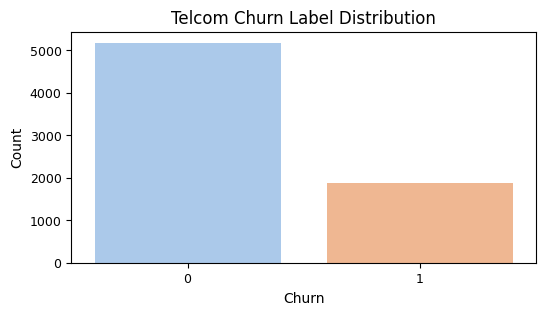

In [25]:
colors = sns.color_palette('pastel')[:len(data['churn_label'].unique())]

plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='churn_label', palette=colors)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Telcom Churn Label Distribution',fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

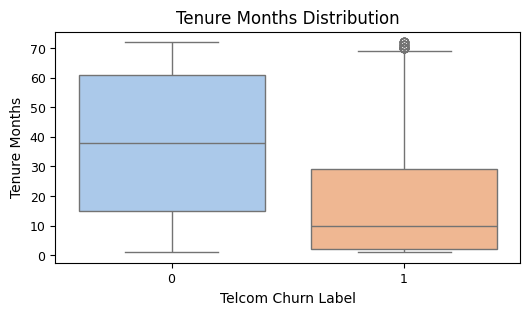

In [26]:
# Define a color palette with distinct colors
colors = sns.color_palette('pastel')[:len(data['churn_label'].unique())]

# Visualizing the relationship between tenure months and customer churn
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x="churn_label", y="tenure_months", palette=colors)
plt.title('Tenure Months Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Telcom Churn Label', fontsize=10)
plt.ylabel('Tenure Months', fontsize=10)
plt.show()

Customers with lower tenure months are more likely to churn

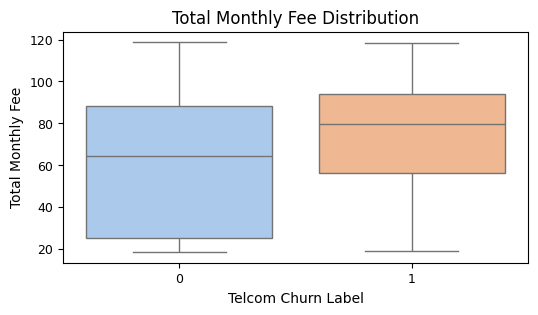

In [27]:
# Define a color palette with distinct colors
colors = sns.color_palette('pastel')[:len(data['churn_label'].unique())]

# visualizing the relationship between total monthly fees and customer churn
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x="churn_label", y="total_monthly_fee", palette=colors)
plt.title('Total Monthly Fee Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Telcom Churn Label', fontsize=10)
plt.ylabel('Total Monthly Fee', fontsize=10)
plt.show()

 The boxplot shows that customers who churned from the telecommunication service (labeled "Yes") tend to have lower total monthly fees compared to those who remained with the service (labeled "No").

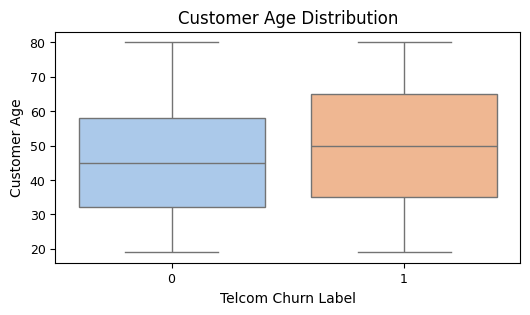

In [28]:
# Define a color palette with distinct colors
colors = sns.color_palette('pastel')[:len(data['churn_label'].unique())]

# visualizing the relationship between total monthly fees and customer churn
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x="churn_label", y="age", palette=colors)
plt.title('Customer Age Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Telcom Churn Label', fontsize=10)
plt.ylabel('Customer Age', fontsize=10)
plt.show()

The boxplot shows that Customers who churned tends to be of higher age than the younger age.

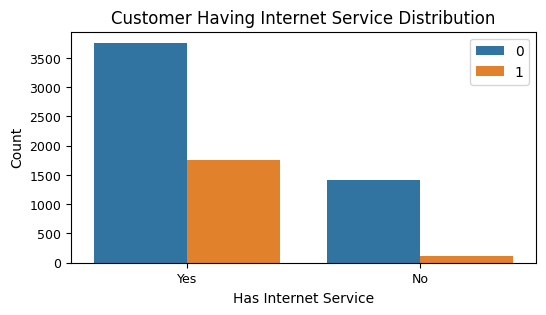

In [29]:
# Create a bar chart to show the distribution of customer churn across internet service options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_internet_service', hue='churn_label')

# Customize the plot
plt.title('Customer Having Internet Service Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Internet Service', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

Based on the chart, it appears a higher percentage of customers who have internet service tend to churn compared to those who don't.

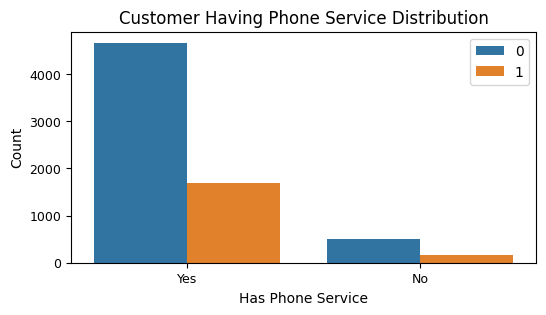

In [30]:
# Create a bar chart to show the distribution of customer churn across phone service options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_phone_service', hue='churn_label')

# Customize the plot
plt.title('Customer Having Phone Service Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Phone Service', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

Based on the chart, it appears a higher percentage of customers who have phone service tend to churn compared to those who don't.

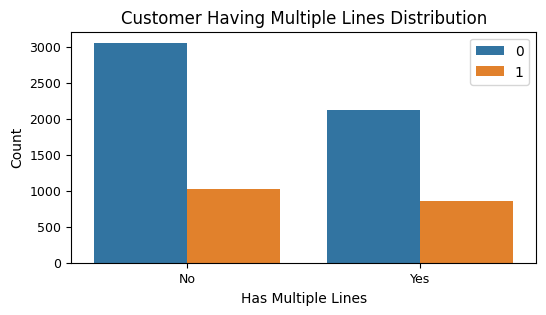

In [31]:
# Create a bar chart to show the distribution of customer churn across Multiple Lines options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_multiple_lines', hue='churn_label')

# Customize the plot
plt.title('Customer Having Multiple Lines Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Multiple Lines', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

The chart does show that there are more customers who do not have multiple lines than those who do.

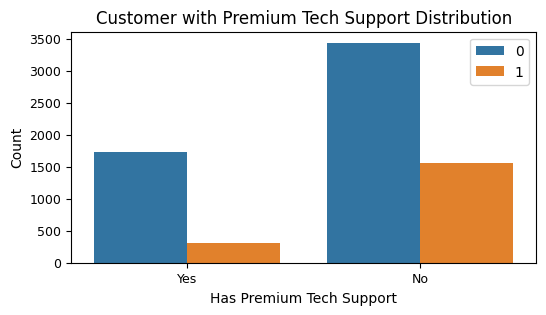

In [32]:
# Create a bar chart to show the distribution of customer churn across Premium Tech Support options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_premium_tech_support', hue='churn_label')

# Customize the plot
plt.title('Customer with Premium Tech Support Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Premium Tech Support', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

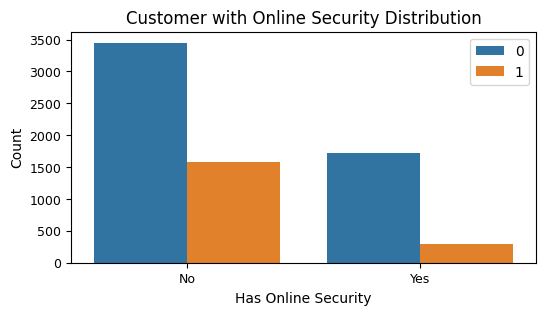

In [33]:
# Create a bar chart to show the distribution of customer churn across Has Oneline Security options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_online_security', hue='churn_label')

# Customize the plot
plt.title('Customer with Online Security Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Online Security', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

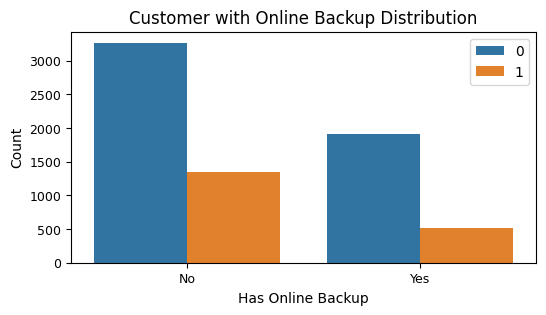

In [34]:
# Create a bar chart to show the distribution of customer churn across Has Oneline Backup options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_online_backup', hue='churn_label')

# Customize the plot
plt.title('Customer with Online Backup Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Online Backup', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

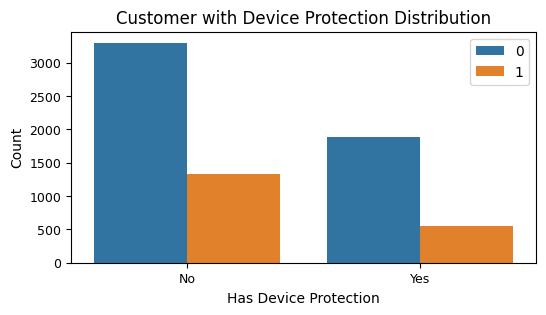

In [35]:
# Create a bar chart to show the distribution of customer churn across Has Device Protection options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='has_device_protection', hue='churn_label')

# Customize the plot
plt.title('Customer with Device Protection Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Has Device Protection', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

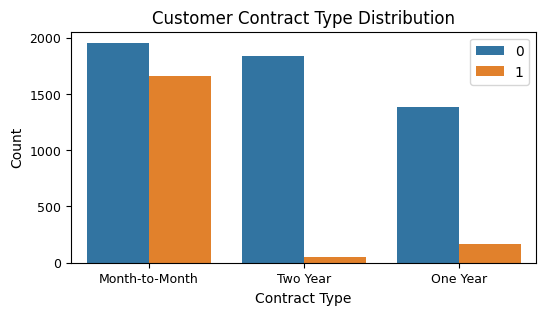

In [36]:
# Create a bar chart to show the distribution of customer churn across contract_type options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='contract_type', hue='churn_label')

# Customize the plot
plt.title('Customer Contract Type Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Contract Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

Customer who are on Month to Month contract type tend to churn more than those with one or Two Year contract

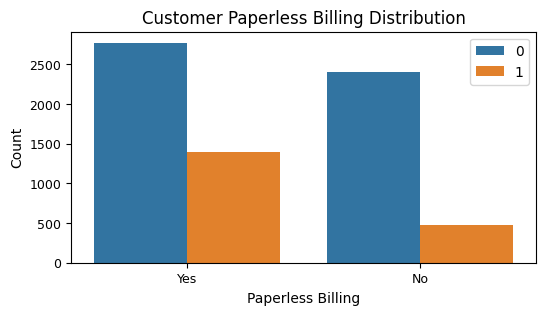

In [37]:
# Create a bar chart to show the distribution of customer churn across paperless_billing options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='paperless_billing', hue='churn_label')

# Customize the plot
plt.title('Customer Paperless Billing Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Paperless Billing', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

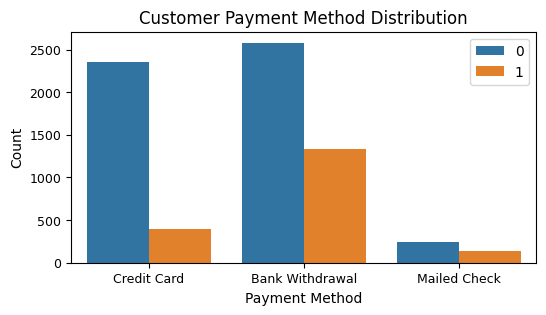

In [38]:
# Create a bar chart to show the distribution of customer churn across payment_method options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='payment_method', hue='churn_label')

# Customize the plot
plt.title('Customer Payment Method Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Payment Method', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

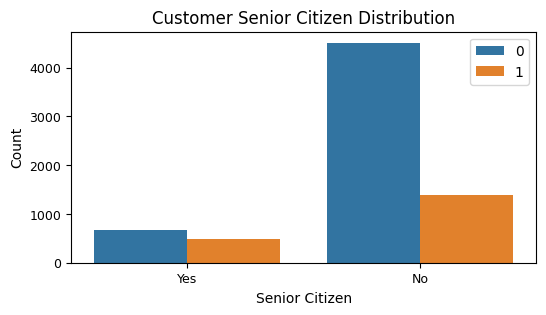

In [39]:
# Create a bar chart to show the distribution of customer churn across senior citizen options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='senior_citizen', hue='churn_label')

# Customize the plot
plt.title('Customer Senior Citizen Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Senior Citizen', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

Senior citizen are higher a higher churn ration than non senior citizen

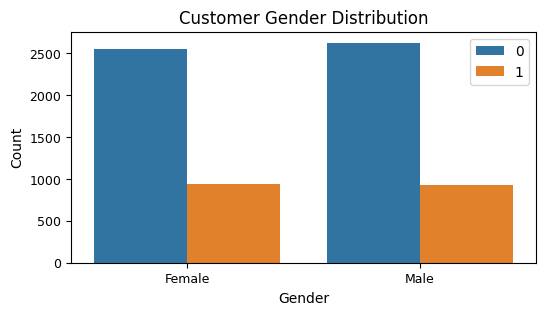

In [40]:
# Create a bar chart to show the distribution of customer churn across customer gender options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='gender', hue='churn_label')

# Customize the plot
plt.title('Customer Gender Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

There are no distinct churn information between the genders

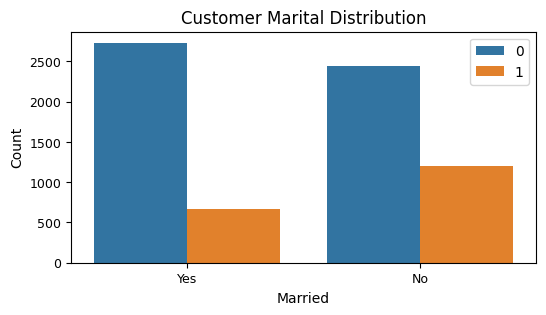

In [41]:
# Create a bar chart to show the distribution of customer churn across mmarital status options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='married', hue='churn_label')

# Customize the plot
plt.title('Customer Marital Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Married', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

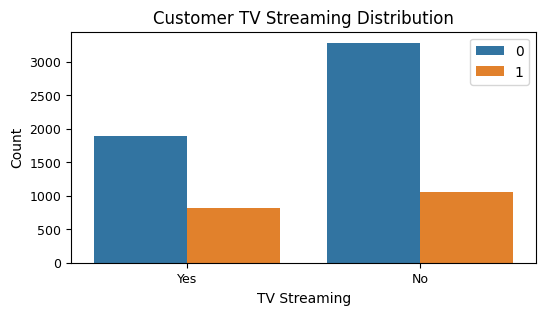

In [42]:
# Create a bar chart to show the distribution of customer churn across TV Streaming status options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='stream_tv', hue='churn_label')

# Customize the plot
plt.title('Customer TV Streaming Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('TV Streaming', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

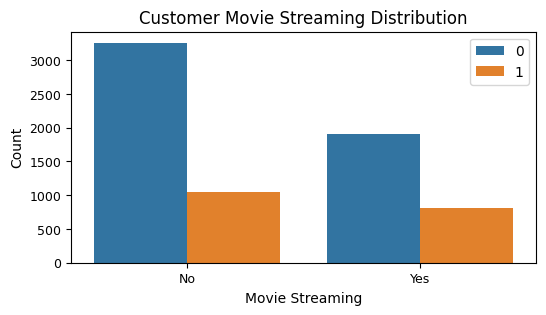

In [43]:
# Create a bar chart to show the distribution of customer churn across Movie Streaming status options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='stream_movie', hue='churn_label')

# Customize the plot
plt.title('Customer Movie Streaming Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Movie Streaming', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

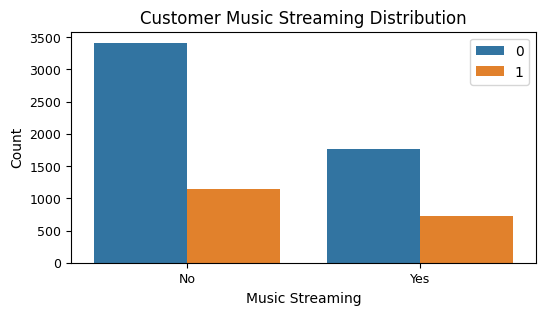

In [44]:
# Create a bar chart to show the distribution of customer churn across Music Streaming status options
plt.figure(figsize=(6,3))
sns.countplot(data=data, x='stream_music', hue='churn_label')

# Customize the plot
plt.title('Customer Music Streaming Distribution', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Music Streaming', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

## Model Building
So, we need an ML model that can do the following:
  - Take the customer detail (TBD) as input
  - Learn the patterns in the input data
  - Fit a mathematical model using these patterns to identify which situations lead to service cancellation
  - Predict the likelihood of cancellation

### **Data Preprocessing**

Data preprocessing is a crucial step as it enable the following.

- **Removing duplicate data**: If your data contains duplicate records, it can skew your results. For example, if you are trying to calculate the average sales of a product, and your data includes duplicate sales records, the average will be artificially inflated.

- **Correcting errors**: If your data contains errors, it can lead to inaccurate results. For example, if your data includes a product with a price of 1000, but the correct price is actually 100, your analysis will be inaccurate.

- **Filling in missing values**: If your data contains missing values, it can make it difficult to analyze. For example, if you are trying to calculate the average age of a group of people, and your data includes missing ages, you will not be able to calculate an accurate average.

- **Transforming the data**: Sometimes, it is necessary to transform the data into a different format in order to make it easier to analyze. For example, if your data is in the form of text, you may need to convert it into numbers in order to perform statistical analysis.

For the current scenario, we will be doing the following data preprocessing steps

 1. **We will encode the categorical variables using numerical values**

   - A computer can understand numbers and not text, so it is important to convert text to numbers

 2. **We will also divide the data into two parts - 70% of the data will be used for training purpose and the remaining 30% for testing purpose**

## Data Preprocessing

In [45]:
data["churn_label"]

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    0
7040    1
7041    0
7042    0
Name: churn_label, Length: 7043, dtype: int64

In [46]:
# Drop some more columns which are not used in the Features Engineering after performing the EDA.
data.drop(columns=['stream_tv'], axis=1, inplace=True)
data.drop(columns=['stream_movie'], axis=1, inplace=True)
data.drop(columns=['stream_music'], axis=1, inplace=True)
data.drop(columns=['has_multiple_lines'], axis=1, inplace=True)
data.drop(columns=['has_online_backup'], axis=1, inplace=True)
data.drop(columns=['has_device_protection'], axis=1, inplace=True)
data.drop(columns=['payment_method'], axis=1, inplace=True)
data.drop(columns=['gender'], axis=1, inplace=True)
data.drop(columns=['married'], axis=1, inplace=True)
data.drop(columns=['senior_citizen'], axis=1, inplace=True)
data.drop(columns=['zip_code'], axis=1, inplace=True)

num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 11


In [47]:
print(data.columns)

Index(['churn_label', 'age', 'tenure_months', 'has_internet_service',
       'has_phone_service', 'has_premium_tech_support', 'has_online_security',
       'contract_type', 'paperless_billing', 'total_monthly_fee',
       'total_charges_quarter'],
      dtype='object')


In [48]:
# Perform Label Encoding for the contact_type column.
# Custom mapping for encoding
mapping = {'Month-to-Month': 0, 'One Year': 1, 'Two Year': 2}

# Apply the mapping
data['contract_type'] = data['contract_type'].map(mapping)

In [49]:
# Perform Label Encoding for has_internet_service column.
# Custom mapping for encoding
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping
data['has_internet_service'] = data['has_internet_service'].map(mapping)

In [50]:
# Perform Label Encoding for has_phone_service column.
# Custom mapping for encoding
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping
data['has_phone_service'] = data['has_phone_service'].map(mapping)

In [51]:
# Perform Label Encoding for has_premium_tech_support column.
# Custom mapping for encoding
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping
data['has_premium_tech_support'] = data['has_premium_tech_support'].map(mapping)

In [52]:
# Perform Label Encoding for has_online_security column.
# Custom mapping for encoding
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping
data['has_online_security'] = data['has_online_security'].map(mapping)

In [53]:
# Perform Label Encoding for paperless_billing column.
# Custom mapping for encoding
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping
data['paperless_billing'] = data['paperless_billing'].map(mapping)

In [54]:
data.to_csv('output.csv', index=False)

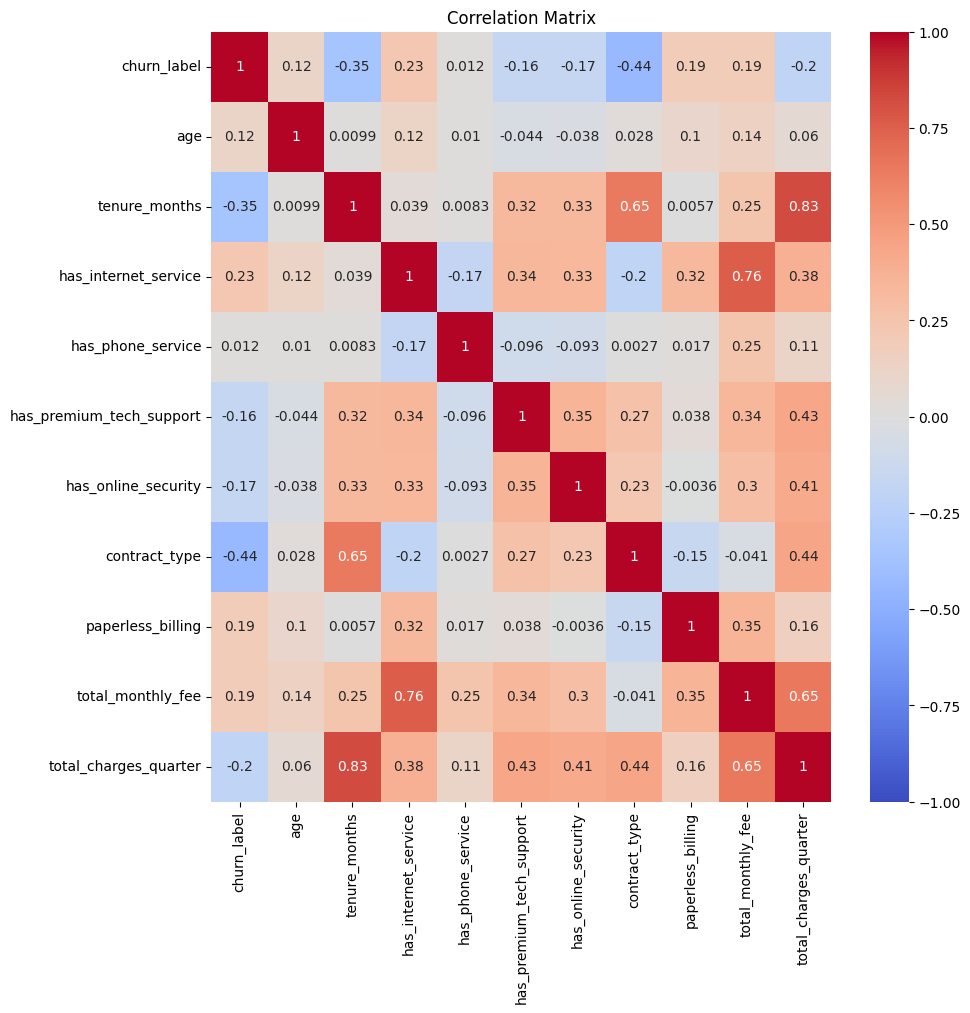

In [55]:
# Remove non-numeric columns from correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select numeric columns

# Generate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [56]:
# Define feature columns

feature_cols = ['tenure_months', 'total_monthly_fee',
                'age', 'contract_type',
                'total_charges_quarter', 'has_phone_service',
                'has_internet_service', 'has_premium_tech_support',
                'has_online_security', 'paperless_billing']

In [57]:
# Extract unique values for each feature
unique_values = {feature: data[feature].unique() for feature in feature_cols}
unique_values

{'tenure_months': array([ 3, 63, 65, 72, 56, 71, 50, 23, 55, 37, 49, 66, 67, 59, 27, 14,  1,
        29, 64, 40, 30, 70, 32, 16,  7, 61, 15,  2, 44, 12, 69, 26, 24, 47,
        58,  9,  6, 19, 46, 35, 52, 11,  8, 41, 68, 36, 22, 20, 54, 60, 25,
        62, 53, 48, 13, 10, 45, 57,  5, 28, 18, 38,  4, 21, 34, 43, 42, 17,
        33, 39, 51, 31], dtype=int64),
 'total_monthly_fee': array([ 83.9 ,  84.65,  90.45, ...,  72.2 ,  39.95, 110.7 ]),
 'age': array([75, 52, 43, 32, 39, 58, 79, 30, 37, 23, 48, 28, 60, 20, 19, 64, 54,
        50, 25, 72, 51, 66, 71, 49, 61, 40, 29, 62, 42, 55, 76, 57, 24, 77,
        56, 73, 59, 78, 22, 33, 53, 38, 35, 44, 80, 45, 41, 70, 63, 46, 21,
        47, 34, 74, 27, 36, 26, 67, 68, 31, 69, 65], dtype=int64),
 'contract_type': array([0, 2, 1], dtype=int64),
 'total_charges_quarter': array([ 267.4 , 5377.8 , 5957.9 , ..., 4627.85, 1612.75,   18.9 ]),
 'has_phone_service': array([1, 0], dtype=int64),
 'has_internet_service': array([1, 0], dtype=int64),
 'has_pr

In [58]:
# separating the input and output variables and perform a final removel of columns in Features Engineering
# X = data.drop(["churn_label"], axis=1)
# y = data["churn_label"]

# Define features (X) and target variable (y)
X = data[feature_cols]
y = data["churn_label"]

Let handle the imbalance Data Set since this is a Binary Classification application

In [59]:
# Let's handle the imbalance churn_label
from collections import Counter
from imblearn.over_sampling import SMOTE

# instantiate the variable
smote = SMOTE()

# fit predictor and target
X_smote, y_smote = smote.fit_resample(X,y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 5174, 1: 1869})
Resample dataset shape Counter({1: 5174, 0: 5174})


In [60]:
# splitting data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [61]:
X.head(5)   # onehotencoding label encoding

,tenure_months,total_monthly_fee,age,contract_type,total_charges_quarter,has_phone_service,has_internet_service,has_premium_tech_support,has_online_security,paperless_billing
0,3,83.90,75,0,267.40,1,1,1,0,1
1,63,84.65,52,2,5377.80,1,1,1,1,1
2,65,90.45,43,2,5957.90,1,1,1,1,1
3,72,101.30,32,2,7261.25,1,1,0,1,1
4,56,45.05,39,2,2560.10,0,1,1,1,0


In [62]:
X.shape

(7043, 10)

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tenure_months             7043 non-null   int64  
 1   total_monthly_fee         7043 non-null   float64
 2   age                       7043 non-null   int64  
 3   contract_type             7043 non-null   int64  
 4   total_charges_quarter     7043 non-null   float64
 5   has_phone_service         7043 non-null   int64  
 6   has_internet_service      7043 non-null   int64  
 7   has_premium_tech_support  7043 non-null   int64  
 8   has_online_security       7043 non-null   int64  
 9   paperless_billing         7043 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 550.4 KB


## Let try for a few Classification Models - Accuracy

In [64]:
def scores(m, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    ms = {}
    
    for n, model in m.items():
        model.fit(X_train,y_train)
        ms[n] = model.score(X_test,y_test)

    ms = pd.DataFrame(ms, index=['Score']).transpose()
    ms = ms.sort_values('Score')
        
    return ms

In [65]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'SVC': SVC(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'CatBoostClassifier': CatBoostClassifier(verbose=0, random_seed=42)}

In [66]:
results  = scores(models, X_train, X_test, y_train, y_test)
results

,Score
SVC,0.67
KNeighborsClassifier,0.78
DecisionTreeClassifier,0.79
LogisticRegression,0.81
AdaBoostClassifier,0.81
GradientBoostingClassifier,0.83
CatBoostClassifier,0.84
RandomForestClassifier,0.85


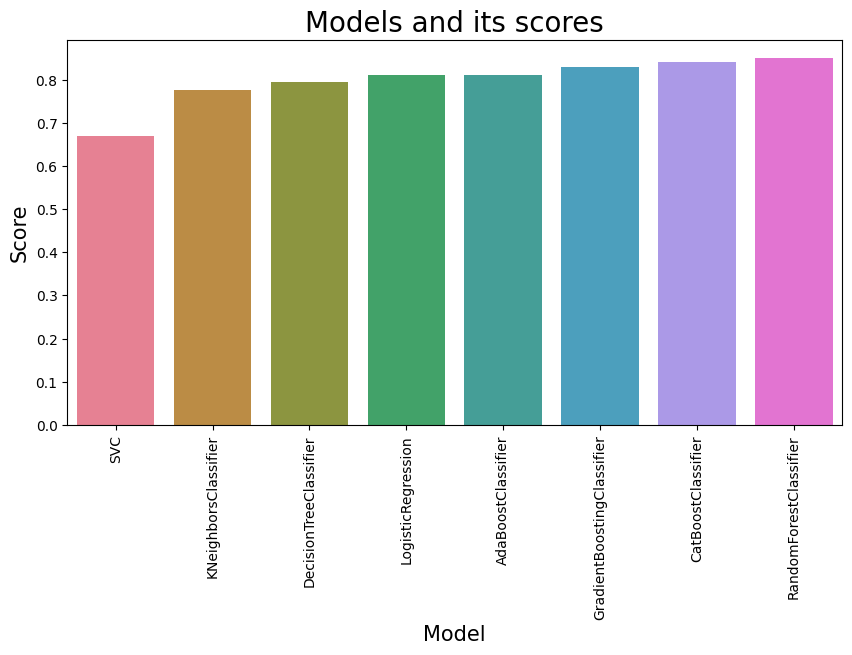

In [67]:
# Define a color palette with different colors
colors = sns.color_palette("husl", len(results))

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.title("Models and its scores", fontsize=20)
sns.barplot(x=results.index, y=results['Score'], palette=colors);

## Let try for a few Classification Models - AUC Score

In [68]:
from sklearn.metrics import roc_auc_score

def scores_auc(m, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    ms = {}
    
    for n, model in m.items():
        model.fit(X_train, y_train)
        # Get the predicted probabilities for the positive class
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            # For models that do not have predict_proba, use decision_function
            y_pred_proba = model.decision_function(X_test)
            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        
        ms[n] = roc_auc_score(y_test, y_pred_proba)

    ms = pd.DataFrame(ms, index=['AUC']).transpose()
    ms = ms.sort_values('AUC')
        
    return ms

results_auc = scores_auc(models, X_train, X_test, y_train, y_test)
results_auc


,AUC
SVC,0.74
DecisionTreeClassifier,0.79
KNeighborsClassifier,0.85
LogisticRegression,0.90
AdaBoostClassifier,0.90
GradientBoostingClassifier,0.91
CatBoostClassifier,0.92
RandomForestClassifier,0.92


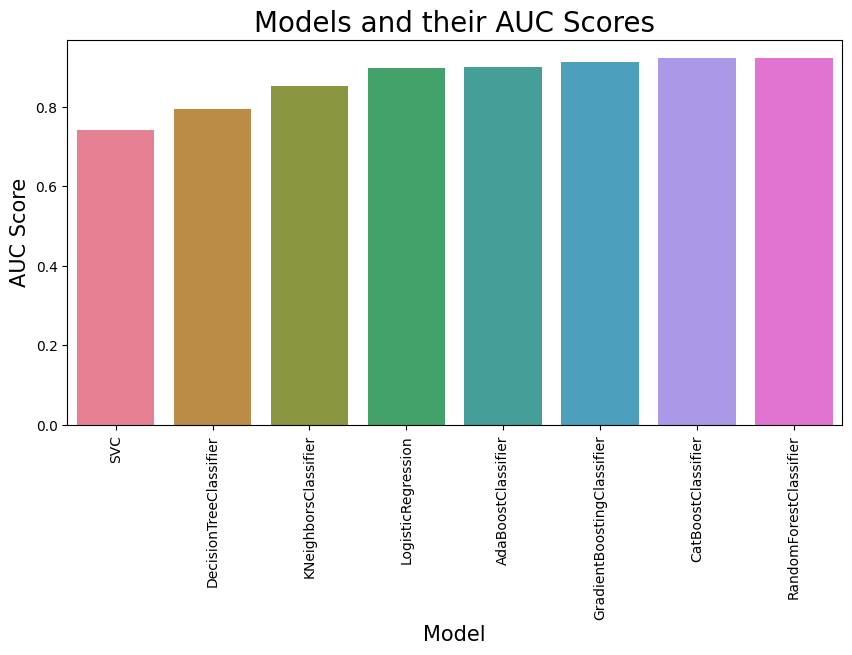

In [69]:
# Define a color palette with different colors
colors = sns.color_palette("husl", len(results_auc))

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=15)
plt.ylabel('AUC Score', fontsize=15)
plt.title("Models and their AUC Scores", fontsize=20)
# sns.barplot(x=results_auc.index, y=results_auc['AUC'])
sns.barplot(x=results_auc.index, y=results_auc['AUC'], palette=colors)
plt.show()

## Model Training and Evaluation

**Logistics Regression**

In [70]:
# Logistic Regression
model = LogisticRegression(C=500, max_iter=50000, random_state=42)
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

# Print the model performance
print('Logistic Regression:')
print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

# Print the classification report
print(classification_report(y_test, y_prediction))

Logistic Regression:
Training accuracy: 0.8230898080144311
Test accuracy: 0.810204870506378
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1313
           1       0.78      0.85      0.82      1274

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



In [71]:
# confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

Confusion Matrix for Training Data:
[[3016  845]
 [ 528 3372]]


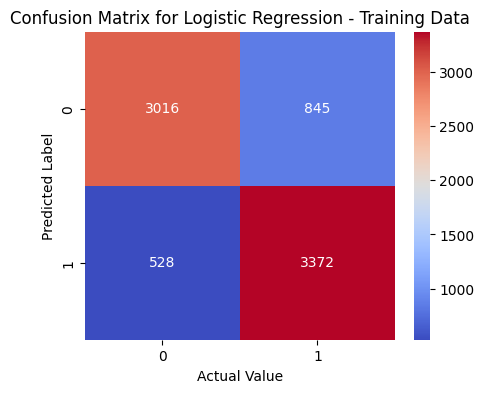

In [72]:
# Logistic Regression
#
# Predictions on the training set
y_train_prediction = model.predict(X_train)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_train, y_train_prediction)
sns.heatmap(cf_mat, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression - Training Data")
plt.show()

In [73]:
# confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)

Confusion Matrix for Test Data:
[[1010  303]
 [ 188 1086]]


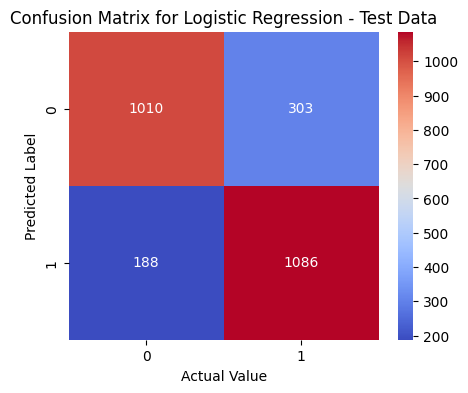

In [74]:
# Logistic Regression
# Predictions on the test set
y_test_prediction = model.predict(X_test)

plt.figure(figsize=(5, 4))
cf_mat_test = confusion_matrix(y_test, y_test_prediction)
sns.heatmap(cf_mat_test, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression - Test Data")
plt.show()

**DecisionTreeClassifier**

In [75]:
# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

# Print the model performance
print('Decision Tree Classifier:')
print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

# Print the classification report
print(classification_report(y_test, y_prediction))

Decision Tree Classifier:
Training accuracy: 0.9998711506249195
Test accuracy: 0.7959025898724391
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1313
           1       0.78      0.81      0.80      1274

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587



In [76]:
# confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

Confusion Matrix for Training Data:
[[3861    0]
 [   1 3899]]


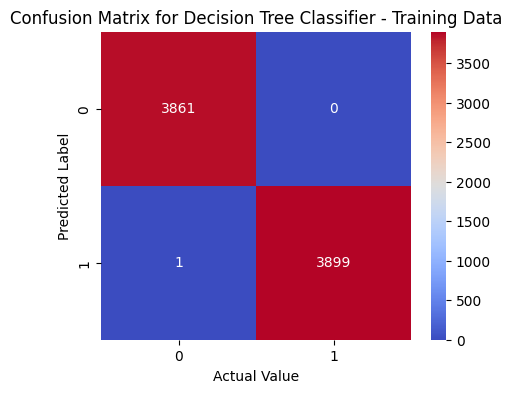

In [77]:
# Decision Tree Classifier
#
# Predictions on the training set
y_train_prediction = model.predict(X_train)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_train, y_train_prediction)
sns.heatmap(cf_mat, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree Classifier - Training Data")
plt.show()

In [78]:
# confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)

Confusion Matrix for Test Data:
[[1031  282]
 [ 246 1028]]


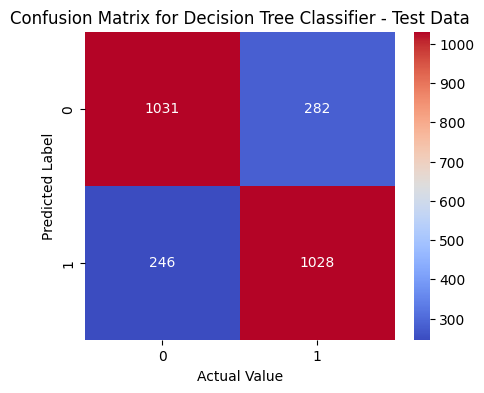

In [79]:
# Decision Tree Classifier
# Predictions on the test set
y_test_prediction = model.predict(X_test)

plt.figure(figsize=(5, 4))
cf_mat_test = confusion_matrix(y_test, y_test_prediction)
sns.heatmap(cf_mat_test, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree Classifier - Test Data")
plt.show()

**GradientBoostingClassifier**

In [80]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

# Print the model performance
print('Gradient Boosting Classifier:')
print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

# Print the classification report
print(classification_report(y_test, y_prediction))

Gradient Boosting Classifier:
Training accuracy: 0.8501481767813426
Test accuracy: 0.8299188248936993
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1313
           1       0.81      0.86      0.83      1274

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587



In [81]:
# confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

Confusion Matrix for Training Data:
[[3146  715]
 [ 448 3452]]


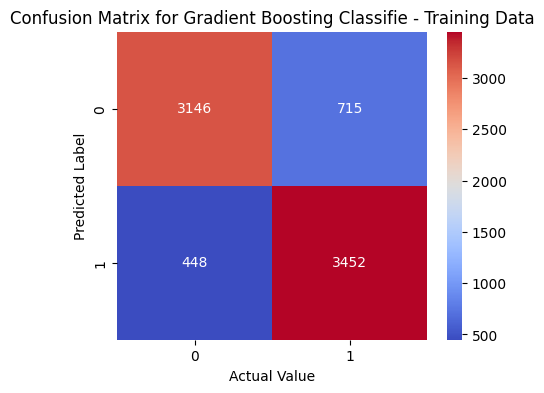

In [82]:
# Gradient Boosting Classifier
#
# Predictions on the training set
y_train_prediction = model.predict(X_train)

plt.figure(figsize=(5, 4))
cf_mat = confusion_matrix(y_train, y_train_prediction)
sns.heatmap(cf_mat, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Gradient Boosting Classifie - Training Data")
plt.show()

In [83]:
# confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)

Confusion Matrix for Test Data:
[[1051  262]
 [ 178 1096]]


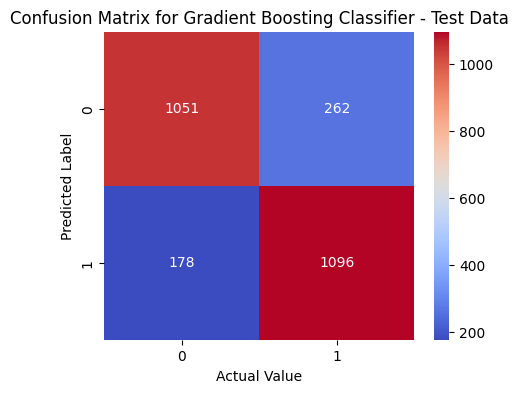

In [84]:
# Gradient Boosting Classifier
# Predictions on the test set
y_test_prediction = model.predict(X_test)

plt.figure(figsize=(5, 4))
cf_mat_test = confusion_matrix(y_test, y_test_prediction)
sns.heatmap(cf_mat_test, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Gradient Boosting Classifier - Test Data")
plt.show()

### Observations from the 3 Selected Model Evaluation
### Logistic Regression, Decision Tree Classifier amd Gradient Boosting Classifier

| **Metric**                     | **Logistic Regression**          | **Decision Tree Classifier**    | **Gradient Boosting Classifier**  |
|--------------------------------|----------------------------------|---------------------------------|-----------------------------------|
| **Training Accuracy**          | 0.8223                           | 0.9999                          | 0.8492                            |
| **Test Accuracy**              | 0.8148                           | 0.7986                          | 0.8284                            |
| **Class 0 Precision**          | 0.85                             | 0.80                            | 0.85                              |
| **Class 0 Recall**             | 0.77                             | 0.80                            | 0.80                              |
| **Class 0 F1-Score**           | 0.81                             | 0.80                            | 0.83                              |
| **Class 1 Precision**          | 0.78                             | 0.80                            | 0.81                              |
| **Class 1 Recall**             | 0.86                             | 0.80                            | 0.85                              |
| **Class 1 F1-Score**           | 0.82                             | 0.80                            | 0.83                              |
| **Macro Avg F1-Score**         | 0.81                             | 0.80                            | 0.83                              |
| **Weighted Avg F1-Score**      | 0.81                             | 0.80                            | 0.83                              |
| **Generalization (Train-Test)**| Good (0.8% gap)                  | Poor (large gap, overfitting)   | Good (2% gap)                     |
| **Overall Performance**        | Balanced, F1 ~0.81               | Balanced, F1 ~0.80              | Highest, F1 ~0.83                 |
| **Handling of Class Imbalance**| Slightly favors recall of class 1| Balanced for both classes       | Slightly better recall for class 1|
| **Recommendation**             | Baseline model                   | Needs pruning or limiting depth | Preferred model                   |



## Hyperparameters Tuning on Gradient Boosting Classifier

Hyperparameters Model tuning is important for

- **Optimizing Performance**: Model tuning allows for finding the optimal configuration of hyperparameters to maximize the performance of the ML model. By systematically adjusting the hyperparameters, such as learning rate, regularization strength, or tree depth, it is possible to find the combination that yields the best results, improving the model's accuracy, precision, recall, or other performance metrics.

- **Determining the right fit**: Model tuning helps in finding the right set of model parameters that yield the best results. By tuning the model, it is possible to strike a balance and achieve an optimal level of complexity that  ensures that the model neither fails to capture the underlying patterns in the data nor learns the training data too well but fails to generalize to new data.

- **Adapting to Data Characteristics**: Model tuning allows for adapting the model to the specific characteristics of the data at hand. Different datasets may require different hyperparameter settings to achieve the best performance. By tuning the model, it becomes possible to adapt to data variations, handle different data distributions, or account for specific data properties, ultimately improving the model's ability to generalize and make accurate predictions.

In [85]:
# choosing the type of ML Model
dummy_model = GradientBoostingClassifier(random_state=42)

# defining the grid of parameters of the ML Model to choose from
parameters = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_leaf_nodes': [150, 250]
}

# defining the model score on which we want to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# running the model tuning algorithm
grid_obj = GridSearchCV(dummy_model, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Getting the best parameters and the best score
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 150, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8425456051141454


In [86]:
# selecting the best combination of parameters for the model to create a new model
tuned_model = grid_obj.best_estimator_

# training the new ML Model
tuned_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=150, n_estimators=200,
                           random_state=42)

In [87]:
# evaluating the model performance on the train data
tuned_model_train_predictions = tuned_model.predict(X_train)
tuned_model_train_score = accuracy_score(y_train, tuned_model_train_predictions)

print("Model Score on Train Data:", np.round(100*tuned_model_train_score, 2))

Model Score on Train Data: 91.51


In [88]:
# evaluating the model performance on the test data
tuned_model_test_predictions = tuned_model.predict(X_test)
tuned_model_test_score = accuracy_score(y_test, tuned_model_test_predictions)

print("Model Score on Test Data:", np.round(100*tuned_model_test_score, 2))

Model Score on Test Data: 84.58


## Observations from Model Evaluation

Our ML model has a score of 87% on the train data and 86% on the test data respectively.

- The train and test performances are much more similar now, so we can say that the model is able to generalize well
- It resolved the over-fitting scenario on training data

## Model Testing

Model testing is important for:

- **Validating model performance**: Testing helps assess how well the model performs under various conditions and scenarios.

- **Identifying and mitigating errors or flaws**: Testing helps uncover any errors, bugs, or weaknesses in the model.

- **Assessing model robustness and generalizability**: Testing helps evaluate the model's performance on new, unseen data.

- **Building user trust and confidence**: Model testing instills trust in the model's capabilities and predictions.

In [89]:
final_model = tuned_model

In [90]:
# evaluating the model performance on the test data
final_model_test_predictions = final_model.predict(X_test)

final_model_test_score = accuracy_score(y_test, final_model_test_predictions)
print("Model Accuracy Score on Test Data:", np.round(100*final_model_test_score, 2))

final_model_test_score = f1_score(y_test, final_model_test_predictions)
print("Model F1 Score on Test Data:", np.round(100*final_model_test_score, 2))

final_model_test_score = recall_score(y_test, final_model_test_predictions)
print("Model Recall Score on Test Data:", np.round(100*final_model_test_score, 2))

final_model_test_score = precision_score(y_test, final_model_test_predictions)
print("Model Precision Score on Test Data:", np.round(100*final_model_test_score, 2))

Model Accuracy Score on Test Data: 84.58
Model F1 Score on Test Data: 84.68
Model Recall Score on Test Data: 86.58
Model Precision Score on Test Data: 82.87


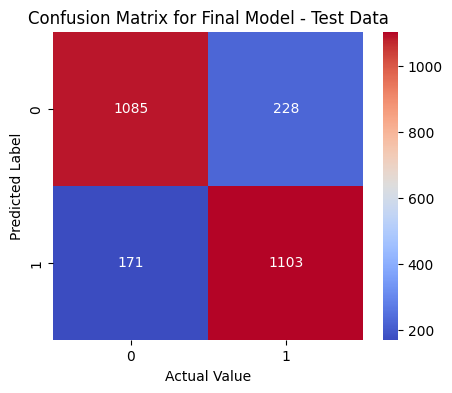

In [91]:
final_model_test_predictions = final_model.predict(X_test)

plt.figure(figsize=(5, 4))
cf_mat_test = confusion_matrix(y_test, final_model_test_predictions)
sns.heatmap(cf_mat_test, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Final Model - Test Data")
plt.show()

Model Accuracy Score on Test Data: 84.58
Model F1 Score on Test Data: 84.68
Model Recall Score on Test Data: 86.58
Model Precision Score on Test Data: 82.87


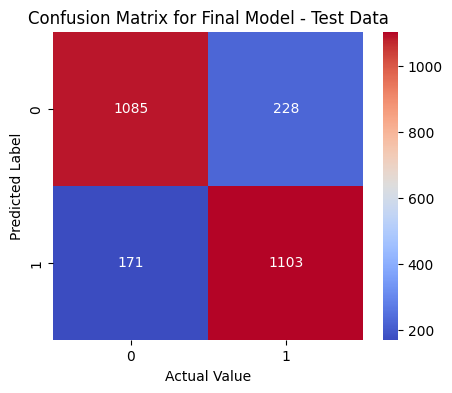

Model AUC Score on Test Data: 0.9191


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score
import plotly.express as px

# Assuming final_model is your trained model, and X_test, y_test are your test data

# Evaluating the model performance on the test data
final_model_test_predictions = final_model.predict(X_test)

final_model_test_score = accuracy_score(y_test, final_model_test_predictions)
print("Model Accuracy Score on Test Data:", np.round(100*final_model_test_score, 2))

final_model_test_score = f1_score(y_test, final_model_test_predictions)
print("Model F1 Score on Test Data:", np.round(100*final_model_test_score, 2))

final_model_test_score = recall_score(y_test, final_model_test_predictions)
print("Model Recall Score on Test Data:", np.round(100*final_model_test_score, 2))

final_model_test_score = precision_score(y_test, final_model_test_predictions)
print("Model Precision Score on Test Data:", np.round(100*final_model_test_score, 2))

# Confusion matrix
plt.figure(figsize=(5, 4))
cf_mat_test = confusion_matrix(y_test, final_model_test_predictions)
sns.heatmap(cf_mat_test, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Final Model - Test Data")
plt.show()

# Calculating predicted probabilities for ROC and AUC
final_model_test_probabilities = final_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, final_model_test_probabilities)

# Calculate AUC
roc_auc = roc_auc_score(y_test, final_model_test_probabilities)
print("Model AUC Score on Test Data:", np.round(roc_auc, 4))

# Plotting the ROC Curve using Plotly
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={roc_auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

# Add the diagonal dash line
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


In [93]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# y_prediction = model.predict(X_test)
final_model_test_predictions = final_model.predict(X_test)

# Print the model performance
print('Gradient Boosting Classifier:')
print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy: {model.score(X_test, y_test)}')

# Print the classification report
print(classification_report(y_test, final_model_test_predictions))

Gradient Boosting Classifier:
Training accuracy: 0.8501481767813426
Test accuracy: 0.8299188248936993
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1313
           1       0.83      0.87      0.85      1274

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



## Observations from Model Testing with Hyperparameters Tuning

| **Metric**                     | **Pre-Tuning**                   | **Post-Tuning**                 |
|--------------------------------|----------------------------------|---------------------------------|
| **Training Accuracy**          | 0.8492                           | 0.8492                          |
| **Test Accuracy**              | 0.8284                           | 0.8284                          |
| **Class 0 Precision**          | 0.85                             | 0.86                            |
| **Class 0 Recall**             | 0.80                             | 0.83                            |
| **Class 0 F1-Score**           | 0.83                             | 0.84                            |
| **Class 1 Precision**          | 0.81                             | 0.83                            |
| **Class 1 Recall**             | 0.85                             | 0.86                            |
| **Class 1 F1-Score**           | 0.83                             | 0.85                            |
| **Accuracy**                   | 0.83                             | 0.84                            |
| **Macro Avg F1-Score**         | 0.83                             | 0.84                            |
| **Weighted Avg F1-Score**      | 0.83                             | 0.84                            |


## Conclusion

In this Telecom Churn Analysis, we applied various machine learning classifiers to predict customer churn. The primary models used were Logistic Regression, Decision Tree Classifier, and Gradient Boosting Classifier. Here are the key conclusions:

**Logistic Regression:**

Performance: Test accuracy of 81.48%, F1-score around 0.81.
Strengths: Good generalization with a small train-test accuracy gap.
Limitations: Slightly lower recall for class 0.

**Decision Tree Classifier:**

Performance: Test accuracy of 79.86%, showed overfitting.
Strengths: Balanced metrics across classes.
Limitations: Significant overfitting; needs pruning or depth limiting.

**Gradient Boosting Classifier (Pre-Tuning and Post-Tuning):**

Performance: Test accuracy improved from 82.84% to 84% after tuning.
Strengths: Excellent generalization and class imbalance handling.
Limitations: More complex and time-consuming to train.

**Remarks for Achieving a Good ML Model**
**Data Quality and Preprocessing:**

Clean dataset with no missing values.
Normalize or standardize features.
Encode categorical variables appropriately.

**Feature Engineering:**

Select relevant features based on analysis.
Create new features for additional information.
Use feature selection techniques.

**Model Selection and Tuning:**

Start with simple models for baselines.
Experiment with various models.
Use hyperparameter tuning to optimize performance.
Consider ensemble methods for better accuracy.

**Evaluation and Validation:**

Use cross-validation for better generalization.
Evaluate models using accuracy, precision, recall, and F1-score.
Compare training and test performance to check for overfitting.
Handling Imbalanced Data:

Use resampling techniques for class imbalance.
Evaluate models with precision-recall curves and F1-score.
Model Interpretability:

Ensure model interpretability.
Use SHAP or LIME to explain predictions.
Continuous Monitoring and Improvement:

Regularly monitor model performance.
Retrain with new data to maintain accuracy.
Stay updated with latest ML advancements.
By following these best practices, you can develop robust ML models that provide valuable insights and accurate predictions, aiding in effective decision-making for telecom churn management.


In [94]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.5.0


In [95]:
from pathlib import Path

Path("../model").mkdir(exist_ok=True)  # Create model/ directory if doesn't exist
joblib.dump(final_model, '../model/GBC_model.pkl')

['../model/GBC_model.pkl']

In [96]:
# import pickle

# Save the model
# with open('GBC_model.pkl', 'wb') as file:
#    pickle.dump(final_model, file)